In [1]:
heart = read.csv("heart_dieseases.csv")
heart = heart[sample(nrow(heart), 1000),] # take sample of 1000 data points
fix(heart)
attach(heart)
y = HeartDiseaseorAttack

In [2]:
summary(heart)

 HeartDiseaseorAttack      BMI            Sex             Age        
 Min.   :0.000        Min.   :16.0   Min.   :0.000   Min.   : 1.000  
 1st Qu.:0.000        1st Qu.:24.0   1st Qu.:0.000   1st Qu.: 6.000  
 Median :0.000        Median :27.0   Median :0.000   Median : 8.000  
 Mean   :0.084        Mean   :28.2   Mean   :0.434   Mean   : 8.109  
 3rd Qu.:0.000        3rd Qu.:31.0   3rd Qu.:1.000   3rd Qu.:10.000  
 Max.   :1.000        Max.   :92.0   Max.   :1.000   Max.   :13.000  

# Single Predictor

## Part (a)

In [3]:
model = glm(y~BMI, family=binomial)
summary(model)


Call:
glm(formula = y ~ BMI, family = binomial)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.01791    0.45721  -6.601 4.09e-11 ***
BMI          0.02197    0.01524   1.441    0.149    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 576.86  on 999  degrees of freedom
Residual deviance: 574.96  on 998  degrees of freedom
AIC: 578.96

Number of Fisher Scoring iterations: 5


## Part (b)

The slope coefficient is 0.033 which is a logg ods ratio, so the odds ratio is $e^{0.022} \approx 1.022$ which means that for every one unit increase in the BMI, a patient is 1.022 times more likely to have a heart attack.

## Part (c)

In [4]:
c = confint(model, level=0.95)[2,]

Waiting for profiling to be done...



In [5]:
print(exp(c))

    2.5 %    97.5 % 
0.9902028 1.0520158 


The confidence interval for the odds ratio is (0.990, 1.052) which contains the value 1. This matters because an odds ratio of 1 means that there is no relationship between the predictor and the response variable - because every 1 unit increase in predictor does not change the likelihood of the response.

## Part (d)

In [6]:
test_bmi = data.frame(BMI=c(20, 30, 40, 50, 60, 70, 80, 90))
pred = predict(model, newdata=test_bmi, type="response")
print(pred)

         1          2          3          4          5          6          7 
0.07053381 0.08636722 0.10535205 0.12792571 0.15450090 0.18542297 0.22091680 
         8 
0.26102770 


To compute these by hand, we would simply plug the values for BMI into the follwing formula:
$$p(x) = \dfrac{e^{-3.33340+0.02197x}}{1+e^{-3.33340+0.02197x}}.$$
However we see that even if the BMI is extremely high (like 90) the probability is still relatively low. This suggests that the model will smiply just predict that the patient will not have a heart attack because the majortiy of the test cases did not - so the accuracy would still be pretty high for the model.

## Part (e)

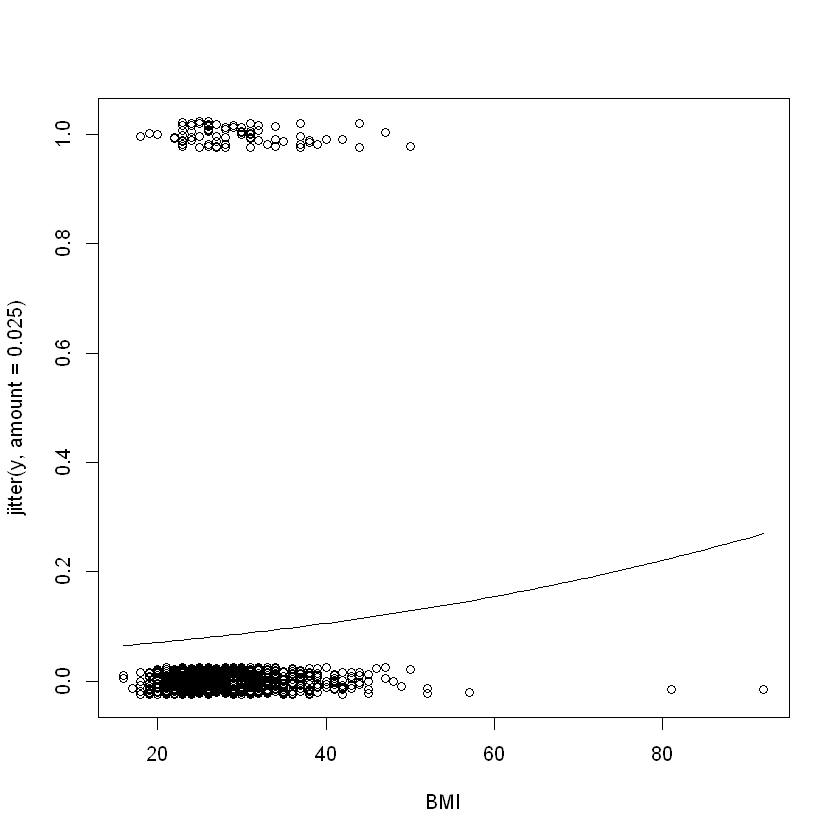

In [8]:
plot(BMI, jitter(y, amount=0.025))
curve(exp(-3.01791+0.02197*x)/(1+exp(-3.01791+0.02197*x)), add=TRUE)

As we suggested earlier, the model just predicts a relatively low probability for each BMI, becauase there are so many more test cases with a response of 0 (no heart attack).

## Part (f)

In [9]:
null_model <- glm(y ~ 1, family = binomial)
summary(null_model)


Call:
glm(formula = y ~ 1, family = binomial)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -2.389      0.114  -20.96   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 576.86  on 999  degrees of freedom
Residual deviance: 576.86  on 999  degrees of freedom
AIC: 578.86

Number of Fisher Scoring iterations: 5


In [10]:
anova(null_model, model, test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,999,576.8634,NA,NA,NA
2,998,574.9589,1,1.904437,0.1675826


We first find the prediction from a null model (no predictor variable) and we compare it to the model we trained on BMI. Running the anova function, we see that the G statistic is 1.904 which results in a p-value of 0.1676 which is not significant to the 0.05 level. This makes sense because we saw in our orginial model that the p-value for the slop was also high (0.149) and from the graph where we saw that the model simply predicted 0 for the HeartAttack response variable.

# Multiple Predictors

## Part (a)

In [29]:
model = glm(y~BMI + Sex + Age, family=binomial)
summary(model)


Call:
glm(formula = y ~ BMI + Sex + Age, family = binomial)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.85567    0.82235  -8.337  < 2e-16 ***
BMI          0.03886    0.01679   2.314   0.0207 *  
Sex          0.59254    0.23803   2.489   0.0128 *  
Age          0.33503    0.05323   6.294  3.1e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 576.86  on 999  degrees of freedom
Residual deviance: 518.44  on 996  degrees of freedom
AIC: 526.44

Number of Fisher Scoring iterations: 6


I chose to simply use all the variables with no higher order or interaction variables. This is because whenever I tried to add them, the results would always have high p-values and inaccurate predictions. Additionally all the parameter sin this model are statistically significant to the 0.05 level which means they are more likely to contribute to making an accurate prediction.

## Part (b)

In [33]:
test_bmi = data.frame(BMI=60, Age=13, Sex=1)
pred = predict(model, newdata=test_bmi, type="response")
print(pred)

        1 
0.6043692 


To see the probability of a male (corresponds to Sex=1) 80 years or older (corresponds to Age=13) with a BMI of 60, we plug the numbers into the following model:
$$\dfrac{e^{0.03886\cdot\text{BMI} + 0.33503\cdot\text{Age} + 0.59254\cdot\text{Sex}}}{1+e^{0.03886\cdot\text{BMI} + 0.33503\cdot\text{Age} + 0.59254\cdot\text{Sex}}}.$$
This gives us a probability of 0.604 that this person will have a heart attack.

## Part (c)

In [12]:
anova(null_model, model, test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,999,576.8634,NA,NA,NA
2,996,518.4358,3,58.42758,1.273833e-12


From the summary of the model in part (a), we see that each of the predictors is statistically significant to the 0.05 level. From the anova summary above we see that the G-statistic is 58.43 which corresponds to a p-value of 1.27e-12 which is extremely low. Thus this model is a good fit to predict whether or not a person will have a heart attack.

# Prediction Table

## Part (a)

In [44]:
prob = fitted(model)

## Part (b)

In [83]:
succ = as.integer(prob>0.5)

## Part (c)

In [84]:
table(y, succ)

   succ
y     0
  0 916
  1  84

(Note that none of the probabilities in succ are above 0.5 so there isn't even a column for 1)

## Part (d)

As wee can see from the table 84 cases were misclassified but that model really only predicted 0 (again because only 84 out of the 1000 people selected in this random sample actually had a heart attack). We would probably have to repeat the process for different samples in order to get a better idea of the accuracy of the model and also lower the thresshold from 0.5 to account for the low proportion of people with a heart attack